In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from activ.pipeline import score_clusters
import matplotlib.pyplot as plt
import scipy
from matplotlib.backends.backend_pdf import PdfPages
import h5py
from scipy.stats import entropy
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as _sch
from collections import Counter
from activ import load_data
from sklearn.decomposition import PCA

In [2]:
data = load_data()
nmfdata = load_data(uoinmf=True)

In [3]:
data_oc = data.outcomes
data_bm = data.biomarkers
nmf_oc = nmfdata.outcome_bases
oc_features = data.outcome_features

In [32]:
pca = PCA(n_components=6)
pca.fit(data_oc)
pca_oc = pca.components_
pca_abs = np.abs(pca_oc)

In [33]:
def rank_features(data):
    values = sorted(data.sum(axis=0))[::-1]
    return values

In [34]:
pca_values = rank_features(pca_abs)
nmf_values = rank_features(nmf_oc)
len(pca_values), len(nmf_values)

(177, 177)

([<matplotlib.axis.YTick at 0x11c453160>,
 <a list of 11 Text yticklabel objects>)

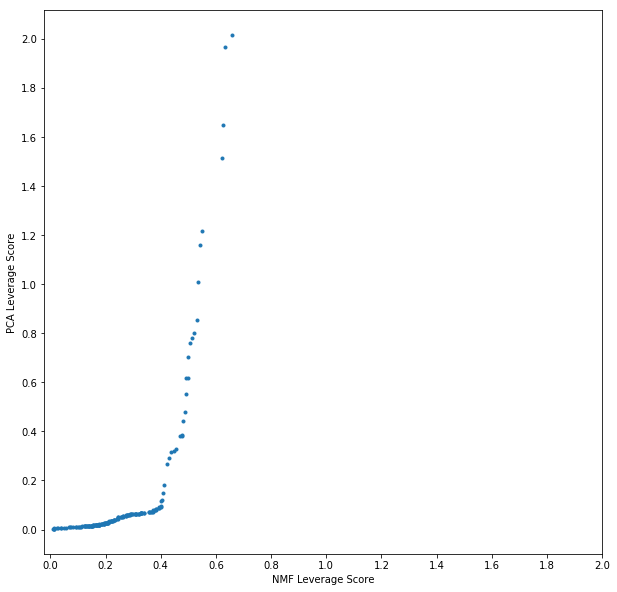

In [39]:
plt.figure(figsize=(10,10))
plt.plot(nmf_values, pca_values, '.')
plt.xlabel('NMF Leverage Score')
plt.ylabel('PCA Leverage Score')
plt.xticks(np.arange(0, 2.2, step=0.2))
plt.yticks(np.arange(0, 2.2, step=0.2))